In [1]:
#load neccesary packages
using Eirene
using CSV
using DataFrames
using Plots
using RCall
using Combinatorics
using Statistics
using StatsPlots
using RDatasets
using HypothesisTests
using VegaLite

R"library(TDA)"

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-8828976400846868071\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-1311248541098934582\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio/main\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n        console.warn(\"Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).\");\n        require([\"/assetserver/1fa6eab5d5e3561aa5d446967b44427fb11bbe3a-dist/main.js\"], function (webIOModule) {\n            webIOModule.load_ipython_extension();\n        });\n        warning_div.innerHTML = \"<strong>Loading WebIO Jupyter extension on an ad-hoc basis. Consider enabling the WebIO nbextension for a stabler experience (this should happen automatically when building WebIO).</strong>\";\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<div\n    id=\"webio-warning-8828976400846868071\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    <!-- TODO: link to installation docs. -->\n</div>\n")


R version 3.6.0 (2019-04-26) -- "Planting of a Tree"
Copyright (C) 2019 The R Foundation for Statistical Computing
Platform: x86_64-w64-mingw32/x64 (64-bit)

R is free software and comes with ABSOLUTELY NO WARRANTY.
You are welcome to redistribute it under certain conditions.
Type 'license()' or 'licence()' for distribution details.

R is a collaborative project with many contributors.
Type 'contributors()' for more information and
'citation()' on how to cite R or R packages in publications.

Type 'demo()' for some demos, 'help()' for on-line help, or
'help.start()' for an HTML browser interface to help.
Type 'q()' to quit R.



┌ Warning: RCall.jl: Warning: package 'TDA' was built under R version 3.6.1
└ @ RCall C:\Users\Tupperware93\.julia\packages\RCall\iojZI\src\io.jl:113


RObject{StrSxp}
[1] "TDA"       "stats"     "graphics"  "grDevices" "utils"     "datasets" 
[7] "methods"   "base"     


In [3]:
#load the adjacency matrix
adjacencyMatrix = CSV.read("C://Users//Tupperware93//fullGraphAdjacencyMatrix.csv", copycols = true, header = false)
birthTimes = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//279birthTimes.csv", copycols = true, header = false)
positions = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//279positions.csv", copycols = true, header = false)
positionsLabels = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//279positionsLabels.csv", copycols = true, header = false)
birthTimesLabels = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//279birthTimesLabels.csv", copycols = true, header = false)
connectionList = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//NeuronConnect_corrected.csv", copycols = true, header = false)
labeledTypeList = CSV.read("C://Users//Tupperware93//Downloads//From Gene Expression File//279labeledTypes.csv", copycols = true, header = false)

,Column1,Column2
,String,String
1,ADAL,inter
2,ADAR,inter
3,ADEL,sensory
4,ADER,sensory
5,ADFL,sensory
6,ADFR,sensory
7,ADLL,sensory
8,ADLR,sensory
9,AFDL,sensory


In [4]:
#process all the data into a single array sorted by birth time

#creates an array for positions with their labels
positionsMatrix = Array{Any, 2}(UndefInitializer(),279,3)

for i in 1:279
    positionsMatrix[i,1] = positionsLabels[1][i]
    positionsMatrix[i,2] = positions[i,1]
    positionsMatrix[i,3] = positions[i,2]
end

#creates an array for positions with their labels
birthTimesMatrix = Array{Any, 2}(UndefInitializer(),279,2)

for i in 1:279
    birthTimesMatrix[i,1] = birthTimesLabels[1][i]
    birthTimesMatrix[i,2] = birthTimes[1][i]
end

#creates an array for types with their labels
typeMatrix = Array{Any, 2}(UndefInitializer(), 279,2)

for i in 1:279
    typeMatrix[i,1] = labeledTypeList[1][i]
    typeMatrix[i,2] = labeledTypeList[2][i]
end



#sorts all the above matricies by neuron label to make them compatible
for i in 1:279
    movement = 0
    
    while i - movement > 1 && positionsMatrix[i - movement, 1] < positionsMatrix[i-movement - 1, 1]
        shadowCache = positionsMatrix[i - movement, :]
        positionsMatrix[i - movement, :] = positionsMatrix[i - movement - 1, :]
        positionsMatrix[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
    
    while i - movement > 1 && birthTimesMatrix[i - movement, 1] < birthTimesMatrix[i-movement - 1, 1]
        shadowCache = birthTimesMatrix[i - movement, :]
        birthTimesMatrix[i - movement, :] = birthTimesMatrix[i - movement - 1, :]
        birthTimesMatrix[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
    
    while i - movement > 1 && typeMatrix[i - movement, 1] < typeMatrix[i-movement - 1, 1]
        shadowCache = typeMatrix[i - movement, :]
        typeMatrix[i - movement, :] = typeMatrix[i - movement - 1, :]
        typeMatrix[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
end


#stores all these data points into a single concise matrix
labelsTimesPositionsType = Array{Any, 2}(UndefInitializer(),279,5)

labelsTimesPositionsType[:,1:2] = birthTimesMatrix[:,:]
labelsTimesPositionsType[:,3:4] = positionsMatrix[:,2:3]
labelsTimesPositionsType[:,5] = typeMatrix[:,2]


#sorts big matrix by birth time
for i in 1:279
    movement = 0
    
    while i - movement > 1 && labelsTimesPositionsType[i - movement, 2] < labelsTimesPositionsType[i-movement - 1, 2]
        shadowCache = labelsTimesPositionsType[i - movement, :]
        labelsTimesPositionsType[i - movement, :] = labelsTimesPositionsType[i - movement - 1, :]
        labelsTimesPositionsType[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
end


#processes connection list and stores that in its own matrix

connectionBase = Array{Any, 2}(UndefInitializer(),6417,4)

for i in 1:6417
    for j in 1:4
        connectionBase[i,j] = connectionList[i,j]
    end
end

#done
println("output: labelsTimesPositionsType and connectionBase")

output: labelsTimesPositionsType and connectionBase


In [5]:
#construct an adjacency matrix sorted by birth time 
birthSortedAdjacencyMatrix = zeros(279,279)

for k in 1:6417
    
    for i in 1:279
        for j in 1:279
            if connectionBase[k,1] == labelsTimesPositionsType[i,1] && connectionBase[k,2] == labelsTimesPositionsType[j,1]
                birthSortedAdjacencyMatrix[i,j] = 1
                birthSortedAdjacencyMatrix[j,i] = 1
            end
            if connectionBase[k,1] == labelsTimesPositionsType[j,1] && connectionBase[k,2] == labelsTimesPositionsType[i,1]
                birthSortedAdjacencyMatrix[i,j] = 1
                birthSortedAdjacencyMatrix[j,i] = 1
            end
        end
    end
    
end

println("output: birthSortedAdjacencyMatrix")

output: birthSortedAdjacencyMatrix


In [6]:
#store all connections
connectionCounter = 0
connectionList = Array{Any, 2}(UndefInitializer(),2287,2)


for i in 2:279
    for j in 1:i-1
        if birthSortedAdjacencyMatrix[i,j] == 1
            connectionCounter += 1
            connectionList[connectionCounter,1] =labelsTimesPositionsType[i,1]
            connectionList[connectionCounter,2] = labelsTimesPositionsType[j,1]
        end       
    end
end


In [7]:
#correct the positions to look nicer
labelsTimesPositionsType[:,3] *= -1
labelsTimesPositionsType[:,4] *= -1

279-element Array{Float64,1}:
  0.038694 
 -0.017391 
  0.015741 
  0.0031842
  0.0068583
  0.013961 
  0.0009838
  0.0039352
 -0.0061235
  0.012052 
 -0.017954 
  0.037868 
  0.0095526
  ⋮        
 -0.033575 
 -0.041206 
 -0.0084256
 -0.027852 
  0.012209 
 -0.021366 
  0.012209 
 -0.018314 
  0.032494 
  0.033321 
 -0.012789 
 -0.012247 

In [8]:
#sort by increasing x-coordinate
for i in 1:279
    movement = 0
    
    while i - movement > 1 && labelsTimesPositionsType[i - movement, 3] < labelsTimesPositionsType[i-movement - 1, 3]
        shadowCache = labelsTimesPositionsType[i - movement, :]
        labelsTimesPositionsType[i - movement, :] = labelsTimesPositionsType[i - movement - 1, :]
        labelsTimesPositionsType[i - movement - 1, :] = shadowCache
        
        movement += 1
    end
end

WARN Missing type for channel "x", using "quantitative" instead.
WARN Missing type for channel "y", using "quantitative" instead.
WARN Missing type for channel "x", using "quantitative" instead.
WARN Missing type for channel "y", using "quantitative" instead.


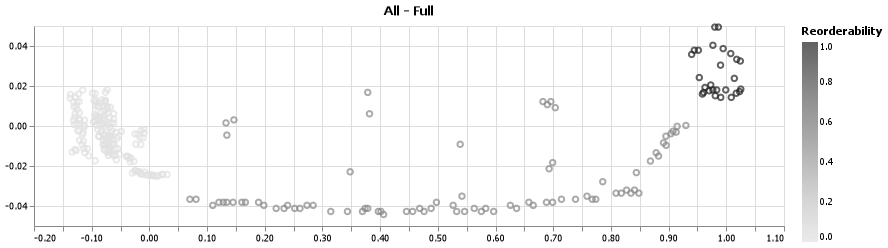

In [9]:
#make sure this generates the correct regions
newTopSim = zeros(279)

for i in 1:169
    newTopSim[i] = 0
end
for i in 1:83
    newTopSim[i+169] = 0.5
end
for i in 1:27
    newTopSim[i+83+169] = 1
end

df = DataFrame(xPosition=labelsTimesPositionsType[:,3], yPosition=labelsTimesPositionsType[:,4], Reorderability=newTopSim)

df |> @vlplot(:point, title = "All - Full", x= {title = "", :xPosition}, y= { title = "", :yPosition},  color = { :Reorderability , scale = {scheme = :greys } }, width = 750)



In [11]:
#make sub-arrays for only the head, tail, and body dection
headLabelsTimesPositionsType = Array{Any, 2}(UndefInitializer(),169,5)
bodyLabelsTimesPositionsType = Array{Any, 2}(UndefInitializer(),83,5)
tailLabelsTimesPositionsType = Array{Any, 2}(UndefInitializer(),27,5)

for i in 1:169
    headLabelsTimesPositionsType[i,:] = labelsTimesPositionsType[i,:]
end
for i in 1:83
    bodyLabelsTimesPositionsType[i,:] = labelsTimesPositionsType[i+169,:]
end
for i in 1:27
    tailLabelsTimesPositionsType[i,:] = labelsTimesPositionsType[i+169+83,:]
end

In [12]:
#determine number of inter and intra connections
headHead = 0
headBody = 0
headTail = 0
bodyBody = 0
bodyTail = 0
tailTail = 0

for k in 1:2287
    initial = connectionList[k,1]
    terminal = connectionList[k,2]
    
    #find location of initial node
    for i in 1:169
        if headLabelsTimesPositionsType[i,1] == initial
            
            for i in 1:169
                if headLabelsTimesPositionsType[i,1] == terminal
                    headHead += 1
                end
            end
      
            for i in 1:83
                if bodyLabelsTimesPositionsType[i,1] == terminal
                    headBody += 1
                end
            end
      
        
            for i in 1:27
                if tailLabelsTimesPositionsType[i,1] == terminal
                    headTail += 1
                end
            end
            
        end
    end
      
    for i in 1:83
        if bodyLabelsTimesPositionsType[i,1] == initial
            
            for i in 1:169
                if headLabelsTimesPositionsType[i,1] == terminal
                    headBody += 1
                end
            end
      
            for i in 1:83
                if bodyLabelsTimesPositionsType[i,1] == terminal
                    bodyBody += 1
                end
            end
      
        
            for i in 1:27
                if tailLabelsTimesPositionsType[i,1] == terminal
                    bodyTail += 1
                end
            end
            
        end
    end
      
        
    for i in 1:27
        if tailLabelsTimesPositionsType[i,1] == initial
            for i in 1:169
                if headLabelsTimesPositionsType[i,1] == terminal
                    headTail += 1
                end
            end
      
            for i in 1:83
                if bodyLabelsTimesPositionsType[i,1] == terminal
                    bodyTail += 1
                end
            end
      
        
            for i in 1:27
                if tailLabelsTimesPositionsType[i,1] == terminal
                    tailTail += 1
                end
            end
        end
    end
end

In [13]:
#concludes with 1301 h-h, 382 h-b, 208 h-t, 208 b-b, 132 b-t, 56 t-t

In [14]:
#make a null model replica where we connect in a manner roughly preserving a distance function
ncopies = 100

#make ncopies slots to place copies of adjacency matrix, and pre-load with 300s
nullModelDistance = zeros(279,279,ncopies)
for k in 1:ncopies
    for i in 1:279
        for j in 1:279
            nullModelDistance[i,j,k] = 300
        end
    end
end


for k in 1:ncopies
        
    #perform selections within regions and make a connection list
    newConnections = zeros(2287,2)
    #1301 h-h connections
    for i in 1:1301
        initial = rand(1:169)
        terminal = rand(1:169)
        while initial == terminal
            terminal = rand(1:169)
        end
        
        newConnections[i,1] = initial
        newConnections[i,2] = terminal
        
    end
    
    #382 h-b connections
    for i in 1:382
        initial = rand(1:169)
        terminal = rand(170:252)
               
        newConnections[i+1301,1] = initial
        newConnections[i+1301,2] = terminal
    end
    
     #208 h-t connections
    for i in 1:208
        initial = rand(1:169)
        terminal = rand(253:279)
               
        newConnections[i+1301+382,1] = initial
        newConnections[i+1301+382,2] = terminal
    end
    
     #208 b-b connections
    for i in 1:208
        initial = rand(170:252)
        terminal = rand(170:252)
        while initial == terminal
            terminal = rand(170:252)
        end
               
        newConnections[i+1301+382+208,1] = initial
        newConnections[i+1301+382+208,2] = terminal
    end
    
    #132 b-t connections
    for i in 1:132
        initial = rand(170:252)
        terminal = rand(253:279)
                  
        newConnections[i+1301+382+208+208,1] = initial
        newConnections[i+1301+382+208+208,2] = terminal
    end
    
     #56 b-b connections
    for i in 1:56
        initial = rand(253:279)
        terminal = rand(253:279)
        while initial == terminal
            terminal = rand(253:279)
        end
               
        newConnections[i+1301+382+208+208+132,1] = initial
        newConnections[i+1301+382+208+208+132,2] = terminal
    end
    
   
    #now using the connections list, load an adjacency matrix
    for i in 1:2287
        initial = trunc(Int, newConnections[i,1])
        terminal = trunc(Int, newConnections[i,2])
        nullModelDistance[initial, terminal,k] = maximum([initial, terminal])
        nullModelDistance[terminal, initial,k] = maximum([initial, terminal])
    end
    
    #now sort this null model by birth time (pretend like nodes are x-coor sorted)
    
    sortThis = labelsTimesPositionsType[:,:]
    
    for p in 1:279
    movement = 0
    
    while p - movement > 1 && sortThis[p - movement, 2] < sortThis[p-movement - 1, 2]
        shadowCache = sortThis[p - movement, :]
        sortThis[p - movement, :] = sortThis[p - movement - 1, :]
        sortThis[p - movement - 1, :] = shadowCache
            
        shadowCache = nullModelDistance[p - movement, :,k]
        nullModelDistance[p - movement, :,k] = nullModelDistance[p - movement - 1, :,k]
        nullModelDistance[p - movement - 1, :,k] = shadowCache 
            
        shadowCache = nullModelDistance[:,p - movement,k]
        nullModelDistance[:,p - movement, k] = nullModelDistance[:,p - movement - 1, k]
        nullModelDistance[:,p - movement - 1, k] = shadowCache   
        
        movement += 1
    end
end

end

In [15]:
BettiCurves = zeros(279,3,ncopies)

for k in 1:ncopies
    
    println(k)

#computes the betti curves in 0-2 dimensions

eireneMatrix = eirene(nullModelDistance[:,:,k], model = "vr", minrad = 0.5, maxrad = 301, maxdim = 2)

#make stuff to store betti curves

barcodes = barcode(eireneMatrix, dim=0)
bigness = size(barcodes,1)
bettiNumber = 0

#calculate and store dimension 0 betti values
for i in 1:bigness
        if barcodes[i,1] == 1
            bettiNumber +=1
        end
end
    
BettiCurves[1,1,k] = bettiNumber

for i in 2:279
        for j in 1:bigness
            if barcodes[j,1] == i
                bettiNumber += 1
            end
            if barcodes[j,2] == i
                bettiNumber -= 1
            end
        end
        BettiCurves[i,1,k] = bettiNumber
end

#calculate and store dimension 1 betti values (resetting variables first)
barcodes = barcode(eireneMatrix, dim=1)
bigness = size(barcodes,1)
bettiNumber = 0

for i in 1:bigness
        if barcodes[i,1] == 1
            bettiNumber +=1
        end
end
    
BettiCurves[1,2,k] = bettiNumber

for i in 2:279
        for j in 1:bigness
            if barcodes[j,1] == i
                bettiNumber += 1
            end
            if barcodes[j,2] == i
                bettiNumber -= 1
            end
        end
        BettiCurves[i,2,k] = bettiNumber
end

#calculate and store dimension 2 betti values (resetting variables first)
barcodes = barcode(eireneMatrix, dim=2)
bigness = size(barcodes,1)
bettiNumber = 0

for i in 1:bigness
        if barcodes[i,1] == 1
            bettiNumber +=1
        end
end
    
BettiCurves[1,3,k] = bettiNumber

for i in 2:279
        for j in 1:bigness
            if barcodes[j,1] == i
                bettiNumber += 1
            end
            if barcodes[j,2] == i
                bettiNumber -= 1
            end
        end
        BettiCurves[i,3,k] = bettiNumber
end
end

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


In [16]:
#computes average and standard deviation of 1000 copies
bettiMeans = zeros(279,3)
bettiStd = zeros(279,3)

for i in 1:279
    bettiMeans[i,1] = mean(BettiCurves[i,1,:])
    bettiMeans[i,2] = mean(BettiCurves[i,2,:])
    bettiMeans[i,3] = mean(BettiCurves[i,3,:])
    
    bettiStd[i,1] = std(BettiCurves[i,1,:])
    bettiStd[i,2] = std(BettiCurves[i,2,:])
    bettiStd[i,3] = std(BettiCurves[i,3,:])
end

In [17]:
BirthTimes = zeros(279)
for i in 1:279
    BirthTimes[i] = (birthTimes[1])[i]
end
sort!(BirthTimes)

279-element Array{Float64,1}:
  253.08
  278.01
  291.01
  293.47
  293.47
  293.65
  294.34
  294.34
  295.0 
  295.41
  295.6 
  296.25
  296.3 
    ⋮   
 1752.4 
 1752.4 
 1866.7 
 1892.1 
 2005.3 
 2005.3 
 2100.4 
 2100.4 
 2100.4 
 2100.4 
 2324.7 
 2324.7 

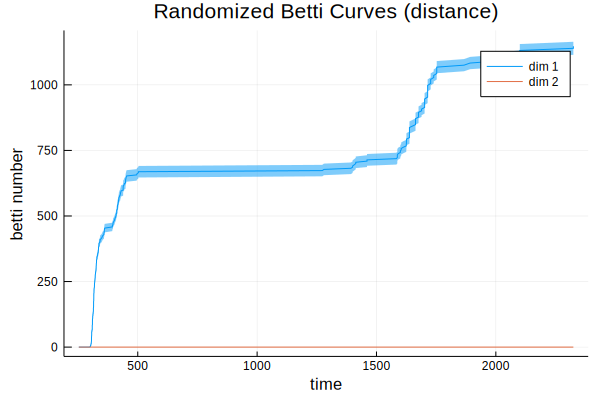

In [18]:
plot(BirthTimes[:], bettiMeans[:,2:3], ribbon = bettiStd[:,2:3], label = ["dim 1", "dim 2"], title = "Randomized Betti Curves (distance)", xlabel = "time", ylabel = "betti number")

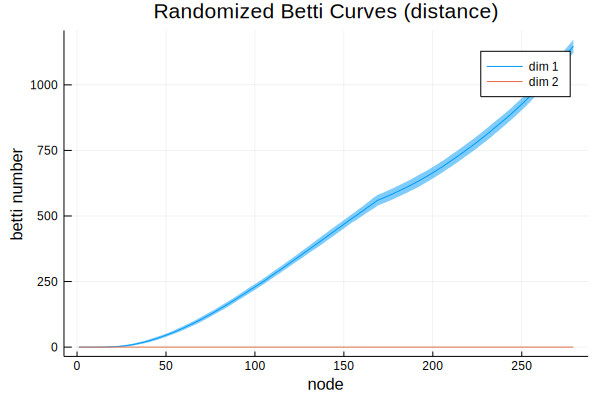

In [19]:
plot(1:279, bettiMeans[:,2:3], ribbon = bettiStd[:,2:3], label = ["dim 1", "dim 2"], title = "Randomized Betti Curves (distance)", xlabel = "node", ylabel = "betti number")

In [20]:
#find the average birth/death rates of the null models



#construct rates matrix for each dimension using a +/- 5 window. column 1 is birth rate, column 2 is death rate
dimensionOneRates = zeros(279,2,ncopies)
dimensionTwoRates = zeros(279,2,ncopies)

for k in 1:ncopies
    println(k)

#find birth and death rate graphs of cavities in dimension 1 and 2 for the kth graph
eireneGraph = eirene(nullModelDistance[:,:,k], model = "vr", minrad = 0.5, maxrad = 301, maxdim = 2)
barcodesOne = barcode(eireneGraph, dim =1)
barcodesTwo = barcode(eireneGraph, dim = 2)


for i in 1:279
    #make and clear counters for new barcodes born and dying in each i+/-5 window
    newBirths1 = 0
    newDeaths1 = 0
    newBirths2 = 0
    newDeaths2 = 0
    
    #look through each barcode to see if one either is born or dies at time i+/1 5
    for j in i-5:i+1
        
        #handle case where j<1
        if j > 0
            newBirths1 += size(findall(x -> x == j, barcodesOne[:,1]))[1]
            newDeaths1 += size(findall(x -> x == j, barcodesOne[:,2]))[1]
        end
        
        if j > 0
            newBirths2 += size(findall(x -> x == j, barcodesTwo[:,1]))[1]
            newDeaths2 += size(findall(x -> x == j, barcodesTwo[:,2]))[1]
        end
    end
        
        
    #set rates at i to be the number of births/deaths in the window centered at i divided by the size of that window
        
    #handle case where i is too close to boundary and the width is not quite 11
    if i <= 5 
        minimum = 1
    end
    if i > 5
        minimum = i-5
    end
    
    if i <= 274 
        maximum = i+5
    end
    if i > 274
        maximum = 279
    end
    
    norm = maximum - minimum + 1
        
    dimensionOneRates[i,1,k] = newBirths1/norm
    dimensionOneRates[i,2,k] = newDeaths1/norm
    dimensionTwoRates[i,1,k] = newBirths2/norm
    dimensionTwoRates[i,2,k] = newDeaths2/norm
    
end
end
println("output: dimensionOneRates and dimensionTwoRates")

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
output: dimensionOneRates and dimensionTwoRates


In [21]:
#computes average and standard deviation of birth/death rates
dimOneRateAve = zeros(279,2)
dimOneRateStd = zeros(279,2)
dimTwoRateAve = zeros(279,2)
dimTwoRateStd = zeros(279,2)

for i in 1:279
    dimOneRateAve[i,1] = mean(dimensionOneRates[i,1,:])
    dimOneRateAve[i,2] = mean(dimensionOneRates[i,2,:])
    dimTwoRateAve[i,1] = mean(dimensionTwoRates[i,1,:])
    dimTwoRateAve[i,2] = mean(dimensionTwoRates[i,2,:])
    
    
    dimOneRateStd[i,1] = std(dimensionOneRates[i,1,:])
    dimOneRateStd[i,2] = std(dimensionOneRates[i,2,:])
    dimTwoRateStd[i,1] = std(dimensionTwoRates[i,1,:])
    dimTwoRateStd[i,2] = std(dimensionTwoRates[i,2,:])
end

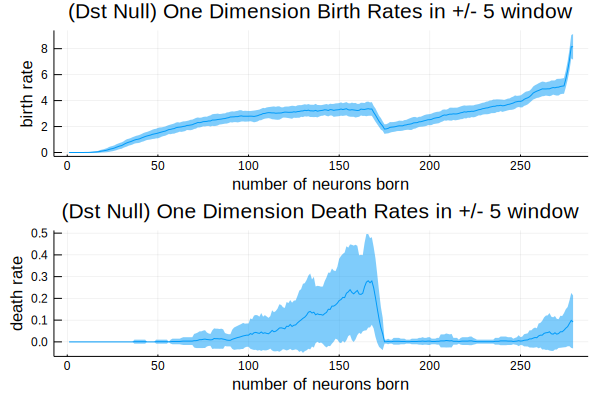

In [22]:
#plot the one dimension birth and death rates by number of neurons born
p1 = plot(1:279, dimOneRateAve[:,1], ribbon = dimOneRateStd[:,1], title = "(Dst Null) One Dimension Birth Rates in +/- 5 window", legend = false, label = ["birth rate"], xlabel = "number of neurons born", ylabel = "birth rate")
p2 = plot(1:279, dimOneRateAve[:,2], ribbon = dimOneRateStd[:,2], title = "(Dst Null) One Dimension Death Rates in +/- 5 window", legend = false, label = ["death rate"], xlabel = "number of neurons born", ylabel = "death rate")

plot(p1, p2, layout = (2,1))

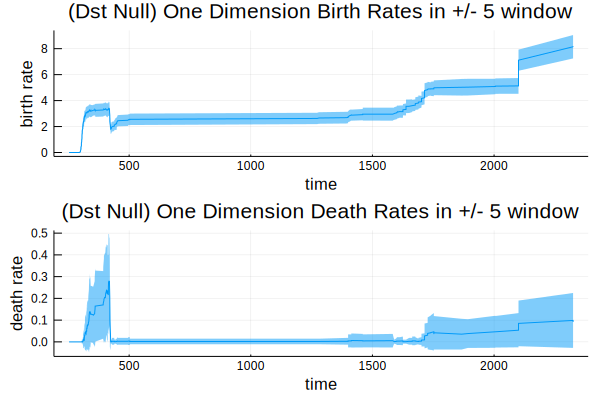

In [23]:
#plot the one dimension birth and death rates by time
p1 = plot(BirthTimes[:], dimOneRateAve[:,1], ribbon = dimOneRateStd[:,1], title = "(Dst Null) One Dimension Birth Rates in +/- 5 window", legend = false, label = ["birth rate"], xlabel = "time", ylabel = "birth rate")
p2 = plot(BirthTimes[:], dimOneRateAve[:,2], ribbon = dimOneRateStd[:,2], title = "(Dst Null) One Dimension Death Rates in +/- 5 window", legend = false, label = ["death rate"], xlabel = "time", ylabel = "death rate")

plot(p1, p2, layout = (2,1))

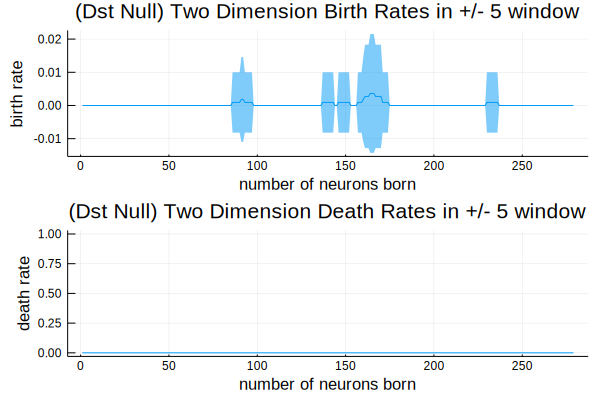

In [24]:
#plot the one dimension birth and death rates by number of neurons born
p1 = plot(1:279, dimTwoRateAve[:,1], ribbon = dimTwoRateStd[:,1], title = "(Dst Null) Two Dimension Birth Rates in +/- 5 window", legend = false, label = ["birth rate"], xlabel = "number of neurons born", ylabel = "birth rate")
p2 = plot(1:279, dimTwoRateAve[:,2], ribbon = dimTwoRateStd[:,2], title = "(Dst Null) Two Dimension Death Rates in +/- 5 window", legend = false, label = ["death rate"], xlabel = "number of neurons born", ylabel = "death rate")

plot(p1, p2, layout = (2,1))

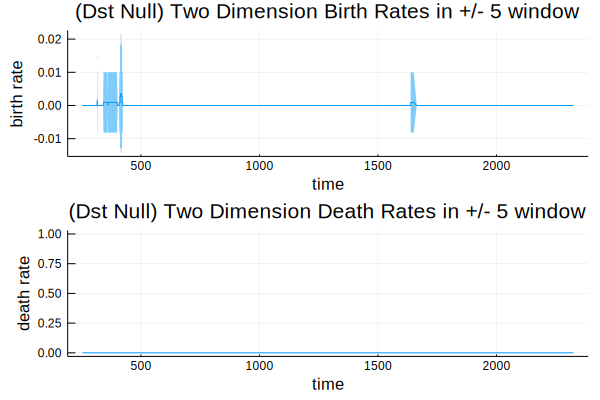

In [25]:
#plot the one dimension birth and death rates by time
p1 = plot(BirthTimes[:], dimTwoRateAve[:,1], ribbon = dimTwoRateStd[:,1], title = "(Dst Null) Two Dimension Birth Rates in +/- 5 window", legend = false, label = ["birth rate"], xlabel = "time", ylabel = "birth rate")
p2 = plot(BirthTimes[:], dimTwoRateAve[:,2], ribbon = dimTwoRateStd[:,2], title = "(Dst Null) Two Dimension Death Rates in +/- 5 window", legend = false, label = ["death rate"], xlabel = "time", ylabel = "death rate")

plot(p1, p2, layout = (2,1))

In [ ]:
topologicalSimilarityOne = zeros(279,279,10)

In [ ]:
#computes topological similarity for first  null model

k=1
    println("************************************")
#hold barcodes for topological similarity calculation
barcodes = Array{Any, 2}(UndefInitializer(), 279,279)

eireneGraph = eirene(nullModel[:,:,k], minrad = 0.5, maxrad = 301, maxdim = 1)

oneDimBarcodes = barcode(eireneGraph, dim =1)

originalBarcodes = zeros(size(oneDimBarcodes)[1],3)

if size(oneDimBarcodes)[1] > 0
    for i in 1:size(oneDimBarcodes)[1]
        originalBarcodes[i,1] = 1
        originalBarcodes[i,2] = oneDimBarcodes[i,1]
        originalBarcodes[i,3] = oneDimBarcodes[i,2]
    end
end

barcodes[1,1] = originalBarcodes

for i in 2:279
    
    println(i)
    
    for j in 1: i-1
        
        newArray = nullModel[:,:,k]
        
        for a in 1:279
            if newArray[i,a] < 300
                newArray[i,a] = maximum([j,a])
                newArray[a,i] = maximum([j,a])
            end
            
            if newArray[j,a] < 300
                newArray[j,a] = maximum([i,a])
                newArray[a,j] = maximum([i,a])
            end
        end
        
        eireneReordered = eirene(newArray, minrad = 0.5, maxrad = 300, maxdim =1)
        reorderedBarcodes = barcode(eireneReordered, dim =1)
            
        newBarcodes = zeros(size(reorderedBarcodes)[1],3)

        if size(reorderedBarcodes)[1] > 0
            for i in 1:size(reorderedBarcodes)[1]
                newBarcodes[i,1] = 1
                newBarcodes[i,2] = reorderedBarcodes[i,1]
                newBarcodes[i,3] = reorderedBarcodes[i,2]
            end
        end
        
        barcodes[i,j] = newBarcodes
    
    end
end
        

#compute topological similarity for this graph


first = barcodes[1,1]

for i in 2:279
    println(i)
    
    for j in 1: i -1
        
        second = barcodes[i,j]
        
        bottleneckDistance = rcopy(R"bottleneck($first, $second, dimension = 1)")
        
        oneDimensionSimilarity = 1 - ( bottleneckDistance / abs(i-j) )
        
        topologicalSimilarityOne[i,j,k] = oneDimensionSimilarity
        
    end
end


println("output: topologicalSimilarityOne")


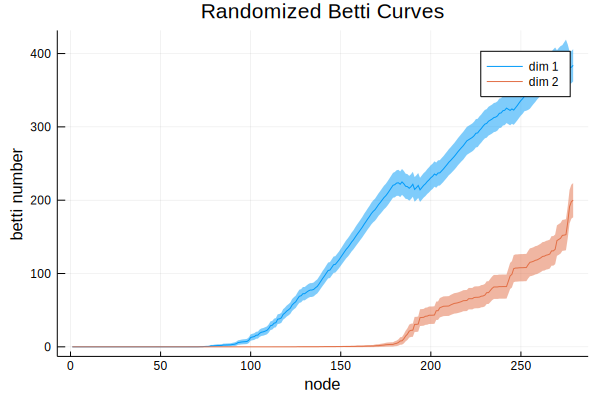